In [30]:
# Import the necessary libraries
from deepface import DeepFace
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [31]:
# Function to display the image
def display_image(image_path):
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [32]:
# Function to get face embedding
def get_face_embedding(image_path, model_name='Facenet512', detector_backend='retinaface', anti_spoofing=True):
    """
    Extracts face embedding from the image using the specified model.
    :param image_path: Path to the image file
    :param model_name: Pre-trained model name to use for embedding (default: 'VGG-Face')
    :return: Embedding vector for the face
    """
    embedding = DeepFace.represent(img_path=image_path, model_name=model_name, detector_backend=detector_backend, anti_spoofing=anti_spoofing)
    return embedding

In [33]:
# Function to display the image with bounding boxes
def display_image_with_boxes(image_path, faces):
    image = cv2.imread(image_path)
    for face in faces:
        x, y, w, h = face['facial_area']['x'], face['facial_area']['y'], face['facial_area']['w'], face['facial_area']['h']
        # Draw a rectangle around the detected face
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Blue box for detected face
    # Convert BGR image to RGB for displaying using matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

In [34]:
# Function to detect faces and get face embedding
def detect_faces_and_get_embedding(image_path, model_name='VGG-Face'):
    """
    Detect faces in an image and extract embeddings.
    :param image_path: Path to the image file
    :param model_name: Pre-trained model name to use for embedding (default: 'VGG-Face')
    :return: List of detected faces with their embeddings
    """
    # Use DeepFace to detect faces and get embeddings
    result = DeepFace.analyze(img_path=image_path, actions=['embedding'], model_name=model_name, detector_backend='opencv', anti_spoofing='true')
    
    # Check if multiple faces are detected
    if isinstance(result, list):
        faces = result
    else:
        faces = [result]
        
    return faces

In [35]:
# Test the function with an example image
image_path = "/home/ghiyas/face_recognition_v3/spoofing_image.jpg"  # Replace with your image path

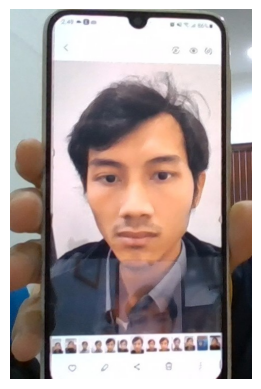

In [36]:
# Display the image
display_image(image_path)

In [38]:
# Get the face embedding using DeepFace
embedding = get_face_embedding(image_path)

24-09-26 17:14:29 - Downloading MiniFASNetV2 weights to /home/ghiyas/.deepface/weights/2.7_80x80_MiniFASNetV2.pth


Downloading...
From: https://github.com/minivision-ai/Silent-Face-Anti-Spoofing/raw/master/resources/anti_spoof_models/2.7_80x80_MiniFASNetV2.pth
To: /home/ghiyas/.deepface/weights/2.7_80x80_MiniFASNetV2.pth
100%|██████████| 1.85M/1.85M [00:00<00:00, 7.33MB/s]


24-09-26 17:14:31 - Downloading MiniFASNetV2 weights to /home/ghiyas/.deepface/weights/4_0_0_80x80_MiniFASNetV1SE.pth


Downloading...
From: https://github.com/minivision-ai/Silent-Face-Anti-Spoofing/raw/master/resources/anti_spoof_models/4_0_0_80x80_MiniFASNetV1SE.pth
To: /home/ghiyas/.deepface/weights/4_0_0_80x80_MiniFASNetV1SE.pth
100%|██████████| 1.86M/1.86M [00:00<00:00, 7.45MB/s]


ValueError: Spoof detected in the given image.

In [39]:
embedding = DeepFace.extract_faces(img_path=image_path, detector_backend='retinaface', enforce_detection=True, anti_spoofing=True)

In [40]:
# Print the embedding vector
print("Face Embedding Vector:")
print(embedding)

Face Embedding Vector:
[{'face': array([[[0.36470588, 0.33333333, 0.37647059],
        [0.34509804, 0.31372549, 0.35686275],
        [0.34901961, 0.31764706, 0.36078431],
        ...,
        [0.40392157, 0.37647059, 0.40392157],
        [0.41176471, 0.38431373, 0.40784314],
        [0.42352941, 0.39215686, 0.41176471]],

       [[0.36470588, 0.33333333, 0.37647059],
        [0.36078431, 0.32941176, 0.37254902],
        [0.36078431, 0.32941176, 0.37254902],
        ...,
        [0.42745098, 0.39607843, 0.42352941],
        [0.41568627, 0.38823529, 0.40784314],
        [0.41176471, 0.38823529, 0.40392157]],

       [[0.36078431, 0.32941176, 0.37254902],
        [0.37254902, 0.34117647, 0.38431373],
        [0.36470588, 0.33333333, 0.37647059],
        ...,
        [0.42745098, 0.40392157, 0.43137255],
        [0.41960784, 0.39607843, 0.41568627],
        [0.41568627, 0.39215686, 0.40784314]],

       ...,

       [[0.16862745, 0.21568627, 0.30196078],
        [0.17254902, 0.21960784, 0.